<a href="https://colab.research.google.com/github/rajkumarpec/Supervised-ML/blob/main/bike_sharing_demand_team_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Project Title : Seoul Bike Sharing Demand Prediction<u><b>

**Project Type** : Regression Model

**Team members Name** : **Dr. Raj Kumar**   and  **Prachi Jadhav**

# **1-Business Context** 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

**List of content**:

* Business Context
* Problem statement
* Importing Essential Libraries
* Load dataset and Data Exploration
* Data Preprocessing 
* Exploratory Data Analysis
* Feature engineering
* ML model implementation
* Model explainability 
* Results
* Summary and conclusions
* References

# **Problem Statement**

* The given dataset is from a rental bike company based out of Seoul. The goal of this project is to develop a machine learning model that can predict the demand for rental bikes.
* The dataset contains the hourly weather conditions for a period of 364 days, and other details such as whether a said day was a holiday or not.
* The dataset containes a total of 8870 records and 14 attributes. There are no duplicate records or missing values in the dataset.

# **2. Importing Essential Libraries**

In [ ]:
# Importing Pandas and Numpy
import pandas as pd
import numpy as np
from numpy import math

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style

import datetime as dt
from datetime import datetime

# Importing Models libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score

# import evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Importing warning for ignore warnings
import warnings
warnings.filterwarnings('ignore')

#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})


# **3-Load dataset and Data Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset

df = pd.read_csv('/content/drive/MyDrive/Bike_demand_prediction/SeoulBikeData.csv',encoding= 'unicode_escape')

In [ ]:
#Making a copy of dataset for safety purpose
df_copy = df.copy()

In [ ]:
# Overview of Data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **3.1-Data Description** 

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

**Attribute Information:** 

* **Date** - year-month-day
* **Rented Bike count** - Count of bikes rented at each hour
* **Hour** - Hour of the day
* **Temperature** - Temperature in Celsius
* **Humidity** - %
* **Windspeed** - m/s
* **Visibility** - 10m
* **Dew point temperature** - Celsius
* **Solar radiation** - MJ/m2
* **Rainfall** - mm
* **Snowfall** - cm
* **Seasons** - Winter, Spring, Summer, Autumn
* **Holiday** - Holiday/No holiday
* **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Shape of dateset
df.shape

(8760, 14)

In [ ]:
# Column of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Statistical info 

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# **4-Data Preprocessing**

### **Data preprocessing is done in the following steps:-**
* 1) Data cleaning
* 2) Data Transformation
* 3) Data Reduction

### **Step-1: Data cleaning**

In [ ]:
#finding the null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

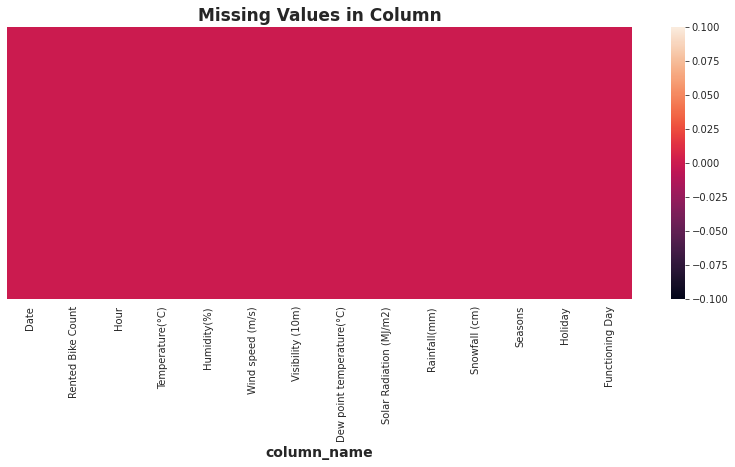

In [ ]:
# Checking Missing Values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=17)
plt.show()

In [ ]:
#checking unique values
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
#checking duplicate values
print(len(df[df.duplicated()]))

0


### **Observation:** 
* There is no missing and duplicate values in dataset.

### **Step-2: Data Transformation**

In [ ]:
# finding the datatype of 'Date' column

type(df['Date'][0])

str

In [ ]:
# converting string format of 'Date' column into date-time format

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.day_name()

#Converted weekdays and weekend into binary class as Weekdays = 0 and Weekend = 1.
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : "1" if x=='Saturday' or x=='Sunday' else "0" )


### **Step-3: Data Reduction**

In [ ]:
# Remove date, day_of_week column from data set
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


# **5-Performing EDA**

#### Look at the data, Hour and month Columns are a numerical columns but these are time stamp so we have to treat Hour and month columns as a categorical feature

In [ ]:
# convert Hour column integer to Categorical 
df['Hour']=df['Hour'].astype('object')

# convert month column integer to Categorical 
df['month']=df['month'].astype('object')


In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

## **5.1-Analyzing the distribution of the dependent variable**

In [ ]:
# defining dependent variable separately
dependent_variable = ['Rented Bike Count']

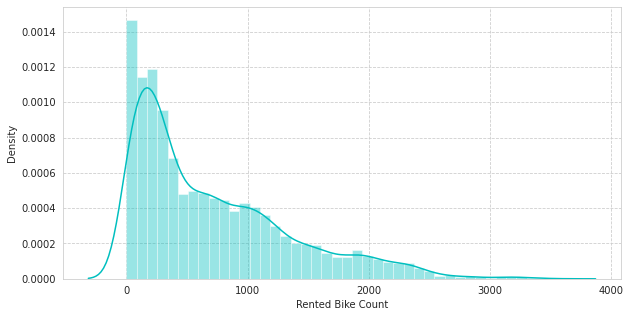

In [ ]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(df['Rented Bike Count'],color="c") 

In [ ]:
#skew of the dependant varaible
df[dependent_variable].skew()

Rented Bike Count    1.153428
dtype: float64

* **Rented Bike Count has moderate skewness toward right. As assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we will perform some operation to make it normal.**

* **After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.**

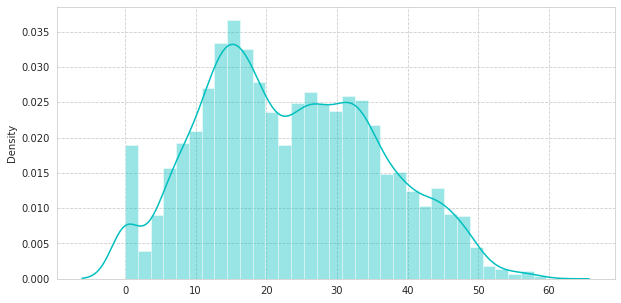

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df[dependent_variable]),color="c")

In [ ]:
# skew of the dependent variable after sqrt transformation
np.sqrt(df[dependent_variable]).skew()

Rented Bike Count    0.237362
dtype: float64

**Obervation:**
* skewness is reduce after square root of dependent variable. Therefore, We will use sqrt of dependent variable in ML modeling.

## **5.2-EDA on Categorical Features**

In [ ]:
categorical_features

,Hour,Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,0,Winter,No Holiday,Yes,1,0
1,1,Winter,No Holiday,Yes,1,0
2,2,Winter,No Holiday,Yes,1,0
3,3,Winter,No Holiday,Yes,1,0
4,4,Winter,No Holiday,Yes,1,0
...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,11,0
8756,20,Autumn,No Holiday,Yes,11,0
8757,21,Autumn,No Holiday,Yes,11,0
8758,22,Autumn,No Holiday,Yes,11,0


In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  month
1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

 
column name  :  weekdays_weekend
0    6216
1    2544
Name: weekdays_weekend, dtype: int64


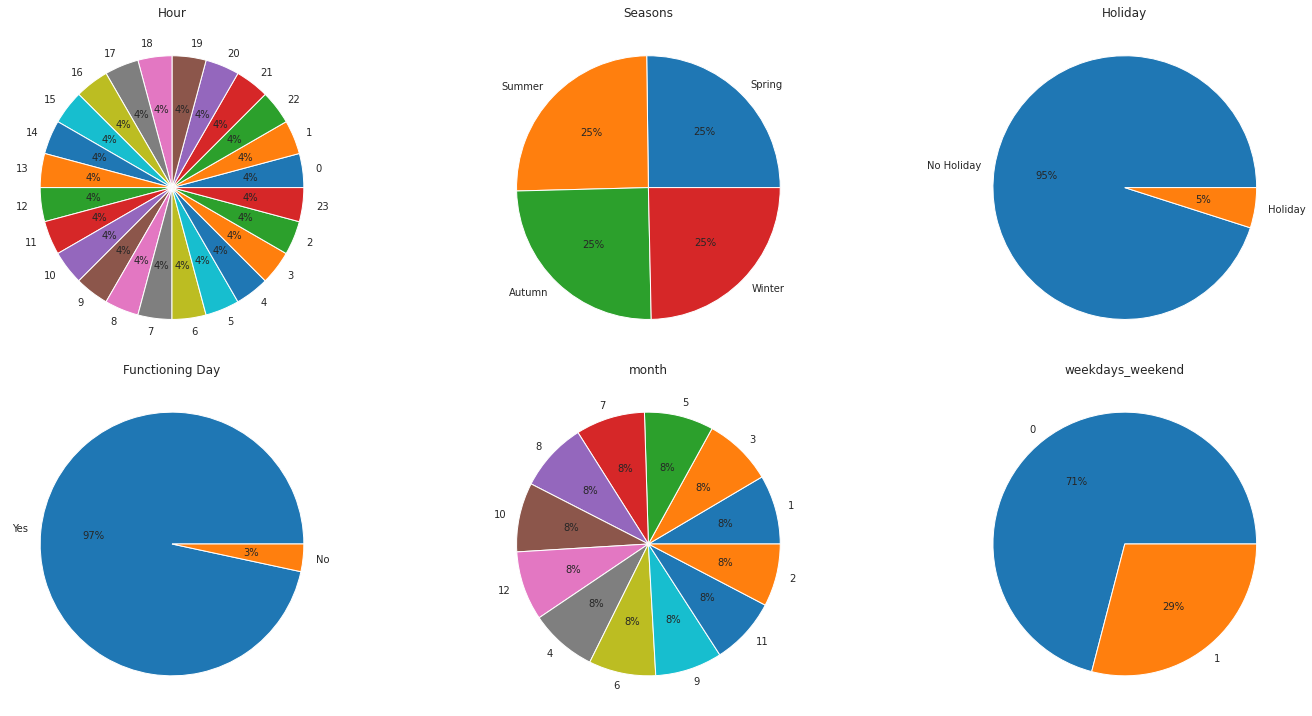

In [ ]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

### **6.2.1-Explore relation between categorical feature and dependent variable**

Text(0.5, 1.0, 'Count of Rented bikes based on Functioning Day')

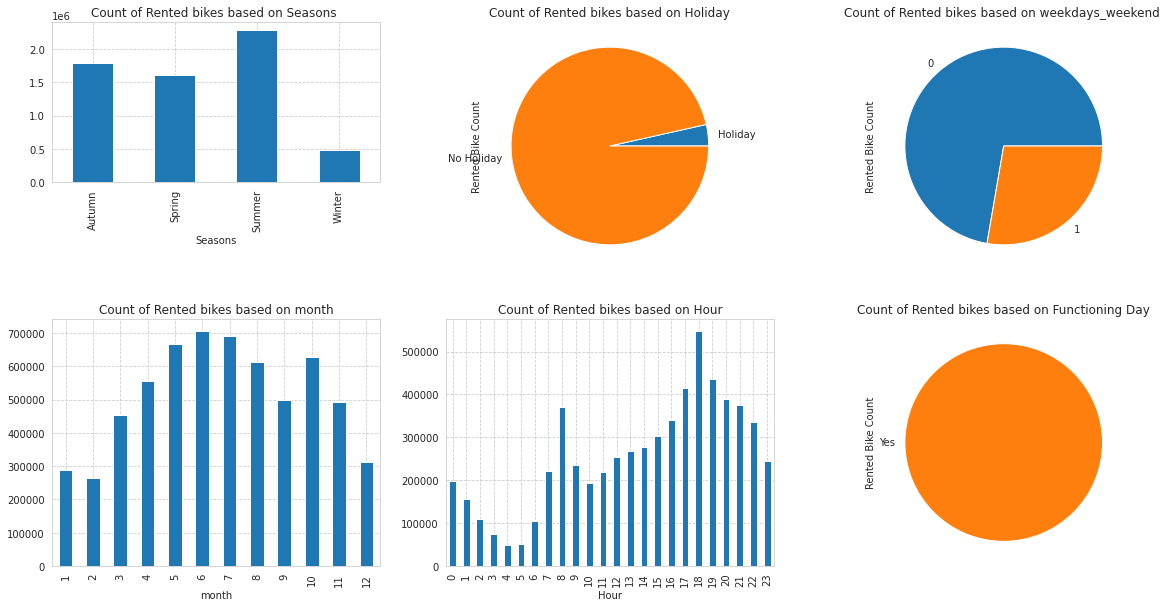

In [ ]:
# Count of rented bike based on each categorical features

fig = plt.figure(figsize=(20, 10))
axes = fig.add_subplot(3, 3, 1)
df_season = df.groupby('Seasons').sum()
df_season['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Seasons ')

axes = fig.add_subplot(2, 3, 2)
df_hol = df.groupby('Holiday').sum()
df_hol['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Holiday')

axes = fig.add_subplot(2, 3, 3)
df_week = df.groupby('weekdays_weekend').sum()
df_week['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on weekdays_weekend ')

axes = fig.add_subplot(2, 3, 4)
df_mon = df.groupby('month').sum()
df_mon['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on month')

axes = fig.add_subplot(2, 3, 5)
df_hour = df.groupby('Hour').sum()
df_hour['Rented Bike Count'].plot(kind='bar')
plt.title('Count of Rented bikes based on Hour')

axes = fig.add_subplot(2, 3, 6)
df_hour = df.groupby('Functioning Day').sum()
df_hour['Rented Bike Count'].plot(kind='pie')
plt.title('Count of Rented bikes based on Functioning Day')

### **Observation:** 

* Most of bikes have been rented in summer followed by Autumn, Spring and Winter.
* Use of rented bike is more on 'No holiday' means on working days as compared to 'Holiday'.
* Most of the bikes have been rented on working days.
* People generally use rented bikes during their working hours.
* People use rented bike only in functioning day.

## **5.3-EDA on Numeric features**


In [ ]:
numeric_features

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
# checking numeric features value count
for i in numeric_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

 
column name  :  Temperature(°C)
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64

 
column name  :  Humidity(%)
53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 90, dtype: int64

 
column name  :  Wind speed (m/s)
1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64

 
column name  :  Visibility (10m)
2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688  

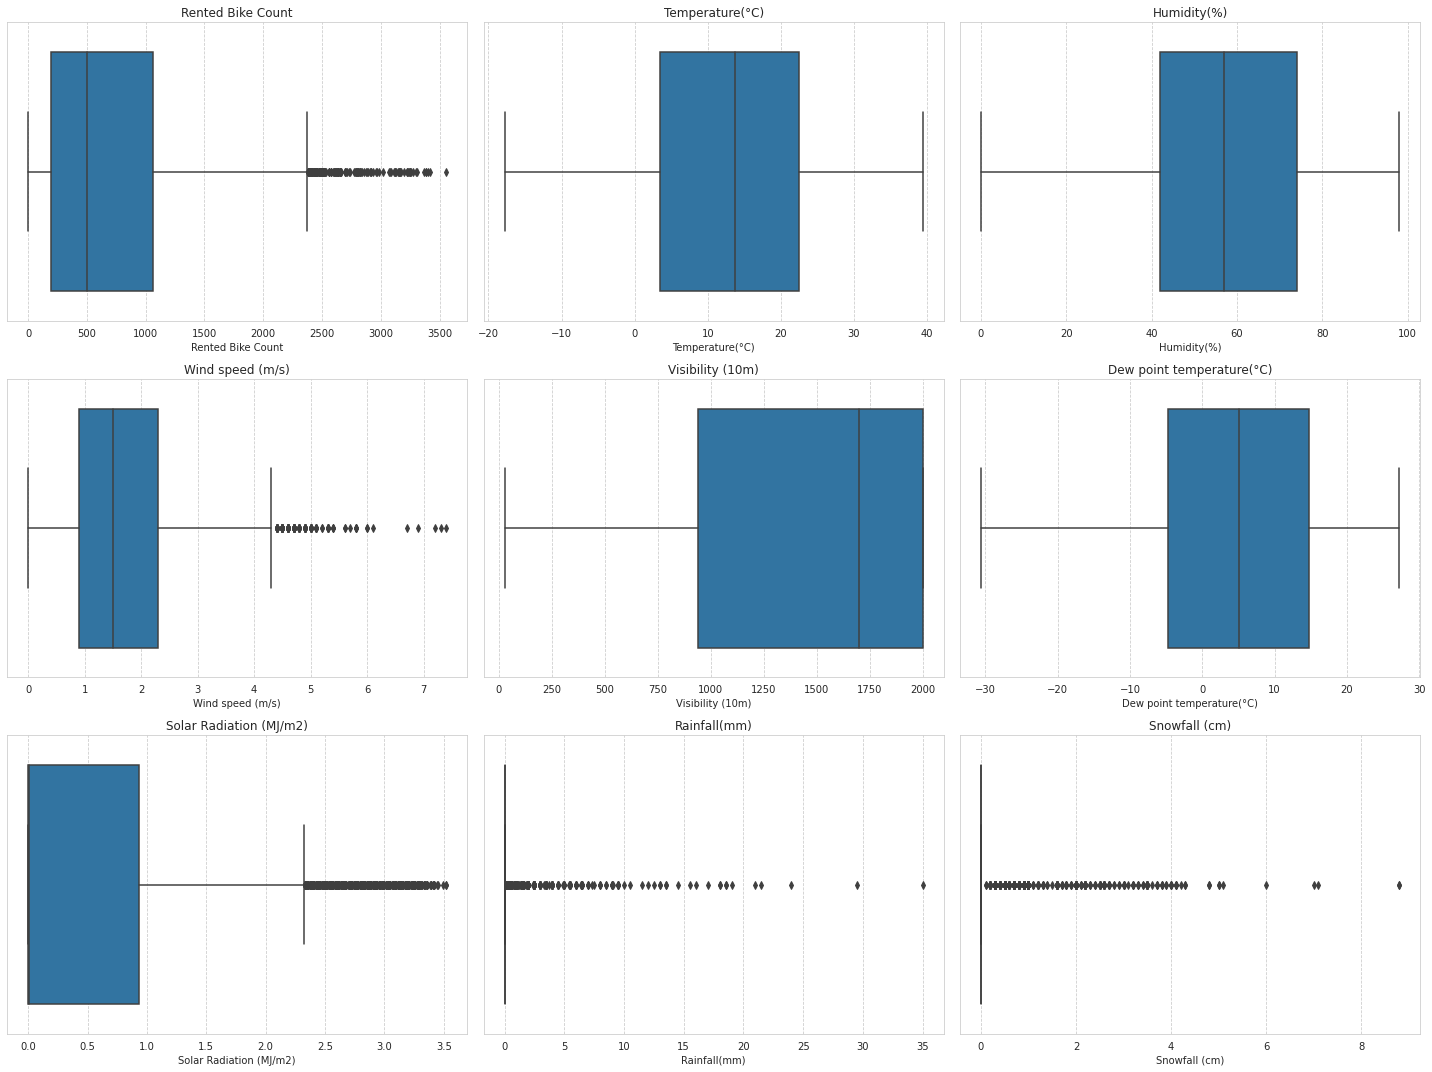

In [ ]:
# checking Outliers in numeric features using seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

**Observation:**
* In our dataset there is outlier presented, but we don't have to worry about outliers, because When we are treating the outlieres from Rainfall and snowfall columns using IQR its removed all the information of the data and all values became zero. 

### **Plotting histogram with mean and median, and distplot of all the numeric features of the dataset**



================================================== Rented Bike Count ==================================================




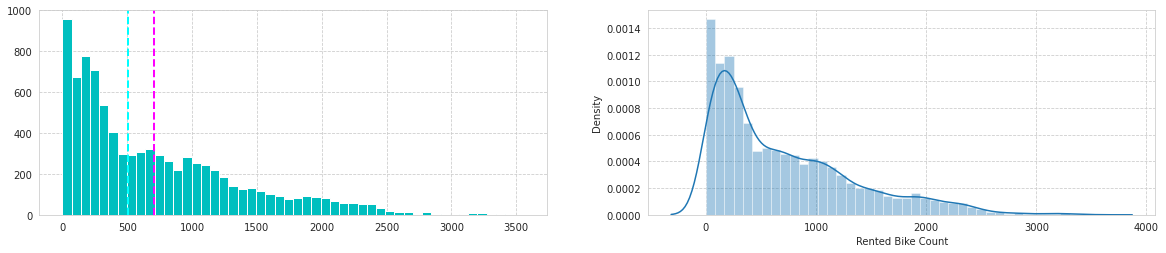



================================================== Temperature(°C) ==================================================




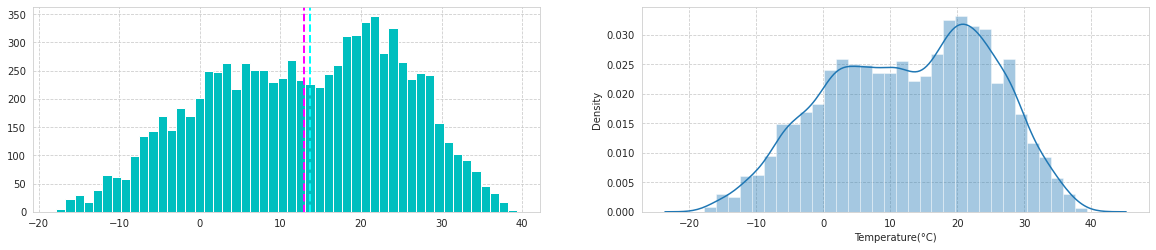



================================================== Humidity(%) ==================================================




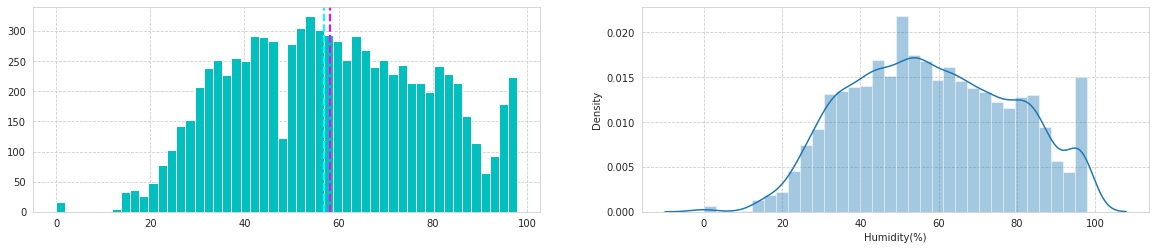



================================================== Wind speed (m/s) ==================================================




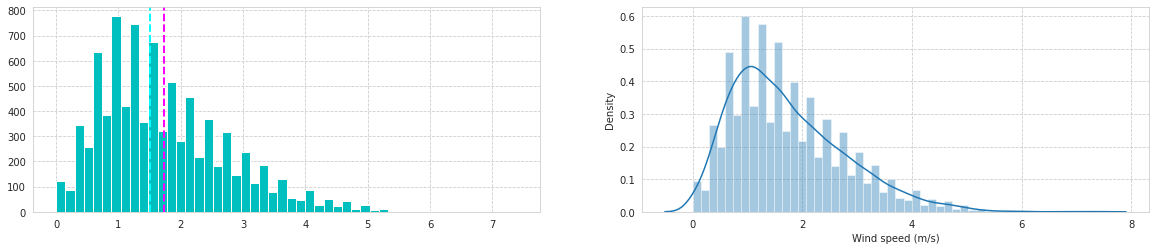



================================================== Visibility (10m) ==================================================




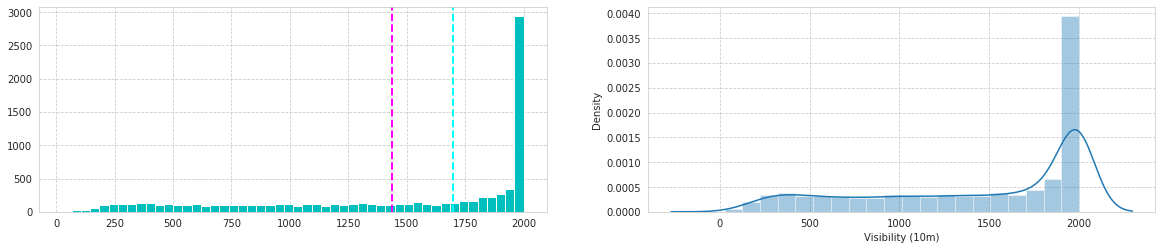



================================================== Dew point temperature(°C) ==================================================




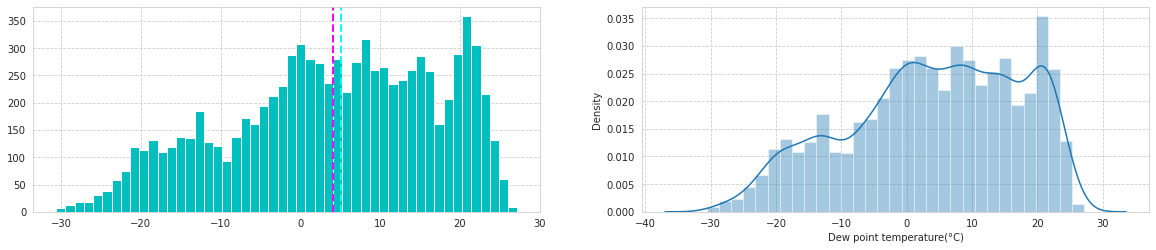



================================================== Solar Radiation (MJ/m2) ==================================================




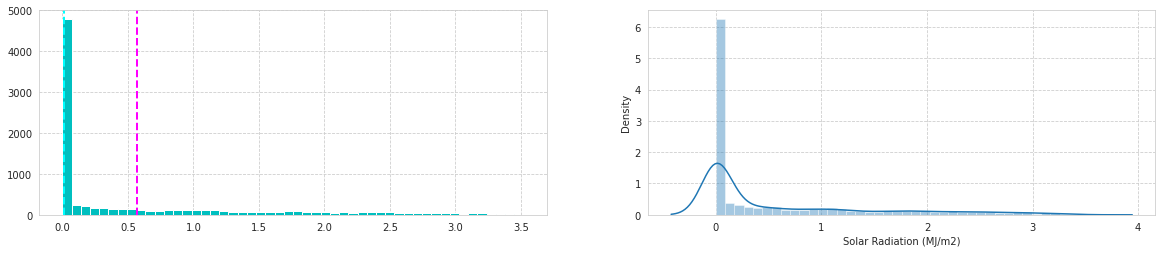



================================================== Rainfall(mm) ==================================================




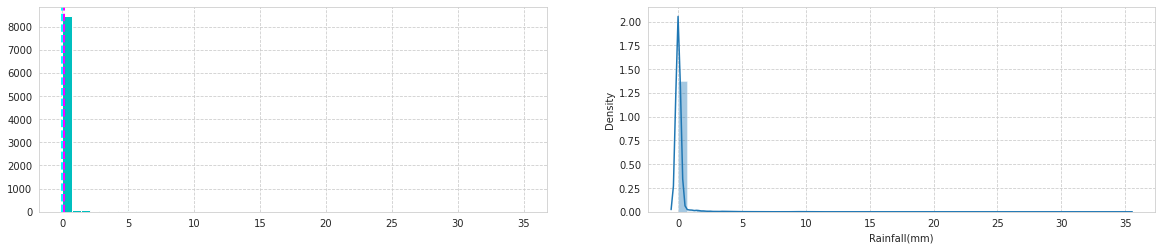



================================================== Snowfall (cm) ==================================================




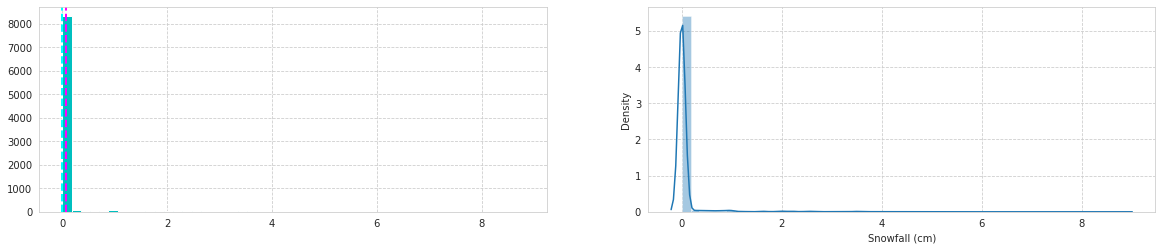

In [ ]:
# Analyzing the distribution of the numeric independent variables

n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*50,i,'='*50)
  print('\n')
  
  feature=df[i]
  feature.hist(bins=50,color="c")
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  plt.show()

**Observations**: 


* **Normally distributed attributes:** temperature, humidity,Dew point temperature(°C).
* **Positively skewed attributes:** wind, solar_radiation, snowfall, rainfall.
* **Negatively skewed attributes:** visibility.

## **Regression plot to know relation between dependent variable and numerical feature**

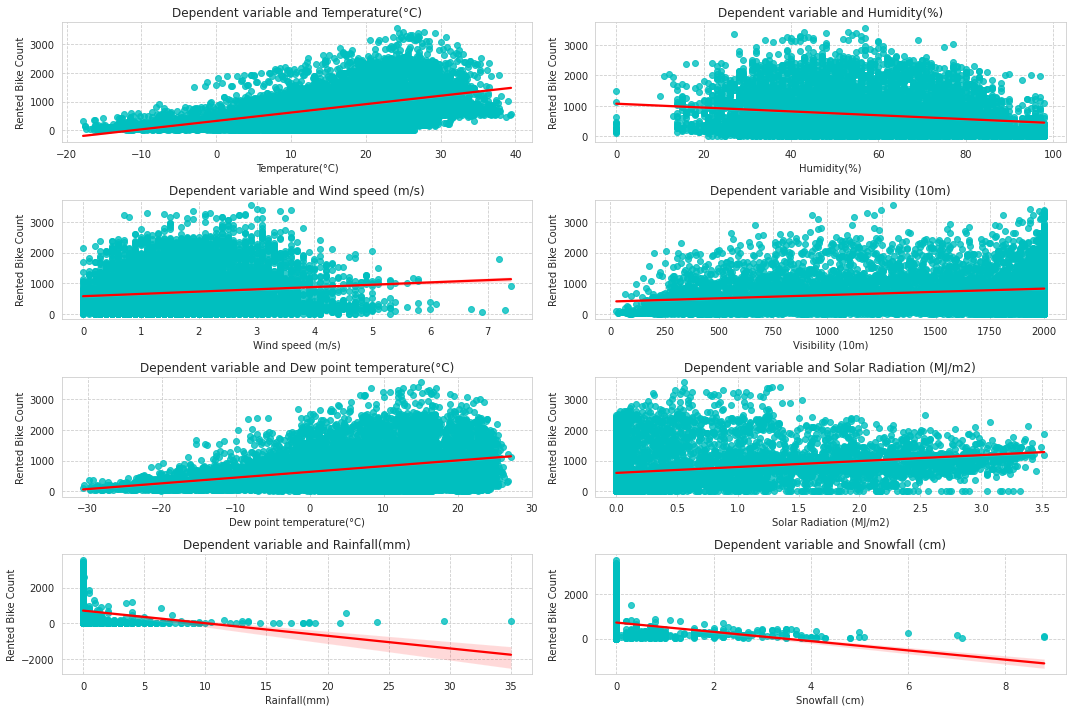

In [ ]:
n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(x=df[i], y=df['Rented Bike Count'],scatter_kws={"color": "c"}, line_kws={"color": "red"})
    plt.title(f'Dependent variable and {i}')
    plt.tight_layout()

**Observations**:

*   Linear regression graph clearly showes that 'Hour','Temperature','Wind_speed','Visibility' and 'Solar_Radiation' are positively related to the dependent variable, i.e., Rented bike count increases with increase of these features.
*  On the other hand, 'Rainfall','Snowfall','Humidity' are negatively related with the dependent variable, i.e., the rented bike count decreases when these features increases.



## **5.4-Check Correlation and Multicollinearity between features**

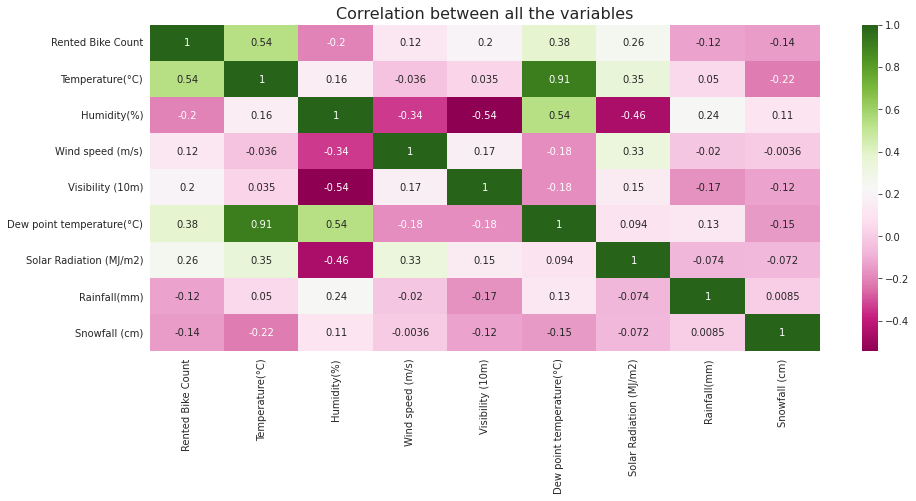

In [ ]:
#checking correlation between independent features using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the variables', size=16)
plt.show()

In [ ]:
# Function to calculate Multicollinearity

# Checking the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  vif_data['VIF'] = round(vif_data['VIF'],2)
  return(vif_data)

In [ ]:
calc_vif(df[[i for i in df.describe().columns]])

,feature,VIF
0,Rented Bike Count,3.62
1,Temperature(°C),34.56
2,Humidity(%),5.09
3,Wind speed (m/s),4.57
4,Visibility (10m),9.06
5,Dew point temperature(°C),16.04
6,Solar Radiation (MJ/m2),2.89
7,Rainfall(mm),1.10
8,Snowfall (cm),1.12


**Observation**: 

* **From heatmap and VIF, we can clearly visible Temperature and Dew point temperature(°C) has the high correlation and high multicollinearity respectively. As a result, to reduce correlation and multicollinearity We can drop dew point temperature column.**

In [ ]:
# Drop Dew Point Temperature Column

df.drop(columns= ['Dew point temperature(°C)'], inplace=True)

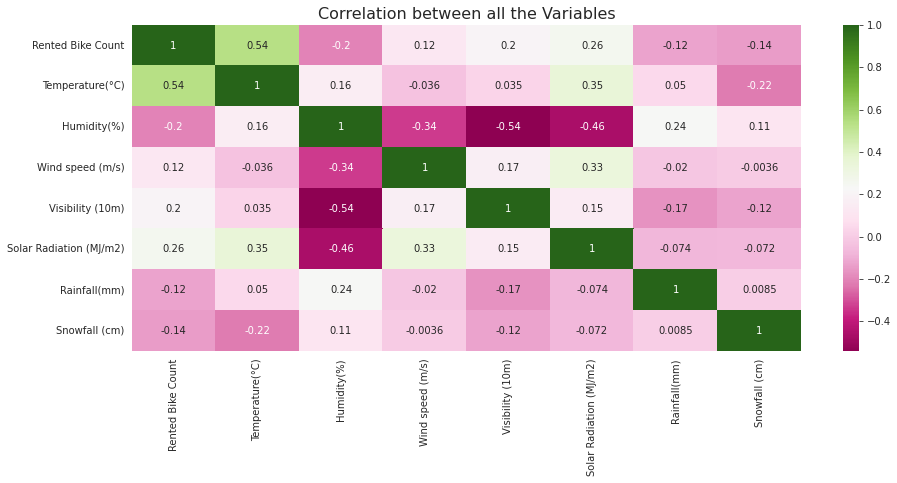

In [ ]:
# Again plot correlation using heatmap

plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)
plt.title('Correlation between all the Variables', size=16)
plt.show()

In [ ]:
# Again check multicolinearilty
calc_vif(df[[i for i in df.describe().columns]])
# calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,feature,VIF
0,Rented Bike Count,3.43
1,Temperature(°C),4.42
2,Humidity(%),4.83
3,Wind speed (m/s),4.21
4,Visibility (10m),4.71
5,Solar Radiation (MJ/m2),2.25
6,Rainfall(mm),1.10
7,Snowfall (cm),1.12


**Observation:** 

* After removable of dew point temperature column, correlation between dependent variable and multicollinearity could be controlled.

**Creating dummy variables and performing the one hot encoding to the dataset:**

# **6-Feature Engineering**

In [ ]:
#Changing the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]= df[col].astype('category')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

In [ ]:
#using pandas get dummies for encoding categorical features
df1= pd.get_dummies(df,drop_first=True,sparse = True)
df1.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

# **7-ML model implementation with SciKit-Learn**

In [ ]:
#Data splitting and value assigning to variables for Regression

X = df1.drop(['Rented Bike Count'], axis = 1)
y = np.sqrt(df1['Rented Bike Count'])            # take sqrt of rented bike count, as this feature is right skewness

In [ ]:
# train test split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


In [ ]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
1444,-11.1,50,1.2,1986,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1652,-5.8,44,2.1,1994,0.00,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7496,11.4,66,0.8,1991,0.18,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1893,-2.3,38,2.3,2000,0.00,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3880,19.1,54,3.2,542,0.94,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_test.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
6056,27.2,69,1.8,1999,0.70,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5556,32.6,51,2.1,800,3.21,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5990,34.0,50,1.2,1744,1.68,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7674,16.9,47,1.4,1637,0.11,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3319,6.4,51,1.0,1398,0.19,0.0,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

1444     5.744563
1652    14.764823
7496     0.000000
1893    11.532563
3880    38.678159
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6132, 47), (2628, 47), (6132,), (2628,))

## **7.1-Linear Regression**

In [ ]:
# Train test data shape

print(X_train.shape)
X_test.shape

(6132, 47)


(2628, 47)

In [ ]:
# Create an instance of the model with parameters
lr_model = LinearRegression()

### **Fit/Train the Model on the training data**
* Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

### **Calculate Performance on Test Set**

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [ ]:
# predict the model
test_predictions = lr_model.predict(X_test)
test_predictions

array([38.89020838, 33.73672537, 32.61571048, ..., 32.16328227,
       14.39205918, 21.750115  ])

In [ ]:
# Checking score
lr_model.score(X_train,y_train)

0.7639277357167614

In [ ]:
#Checking Coefficent
lr_model.coef_

array([ 4.57881003e-01, -1.34892583e-01, -1.58120904e-01,  4.28337127e-04,
        1.09801502e+00, -1.92072503e+00, -6.64124888e-02, -1.88636248e+00,
       -4.98955023e+00, -7.27792953e+00, -9.58783674e+00, -9.35766697e+00,
       -4.74807836e+00,  1.73063814e+00,  7.02276178e+00,  1.02357218e+00,
       -3.47730313e+00, -3.52863802e+00, -3.13103547e+00, -3.04712720e+00,
       -3.27823695e+00, -1.93718850e+00,  2.42957615e-01,  4.17417177e+00,
        1.01564300e+01,  7.31410429e+00,  6.43502397e+00,  6.57780783e+00,
        5.30395545e+00,  1.68038661e+00, -3.11478006e+00, -3.35337827e+00,
       -7.18870989e+00,  2.88709545e+00,  2.88279447e+01, -8.56340228e-01,
        1.23797749e-01,  3.94834896e-02,  1.25452654e+00,  4.12852225e+00,
       -3.06589501e-01, -7.71361847e-01,  5.53978801e-02,  1.78872540e+00,
        6.84808182e-01,  1.16312081e+00, -6.16435459e-01])

### **Evaluation on the Test Set**

### **Metrics**
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [ ]:
# Performance Metrics calculation function 
def print_metrics(actual, predicted):
  print('MSE is: {}'.format(mean_squared_error(y_test, test_predictions)))
  print('RMSE is: {}'.format(math.sqrt(mean_squared_error(y_test, test_predictions))))
  print('R2 score: is {}'.format(r2_score(y_test, test_predictions)))
  print('MAE is: {}'.format(mean_absolute_error(y_test, test_predictions)))
  

In [ ]:
#Adjusted R2 (considers and tests different independent variables against the model)
def Adjusted_R2(actual, predicted):
  Adj_R2 = (1-(1-r2_score(actual, predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
  return('Adjusted R2 :', Adj_R2)


In [ ]:
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 38.89441975349788
RMSE is: 6.236539084580316
R2 score: is 0.7439854499521588
MAE is: 4.662664327957547


('Adjusted R2 :', 0.7393216190016749)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict1={'Model':'Linear regression ',
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# Making a dataset for comparing performance metrics later

# dict2= {'Model':'Linear regression',
#        'MAE': round((MAE),3),
#        'MSE': round((MSE),3),
#        'RMSE': round((RMSE),3),
#        'R2': round((R2),3),
#        'Adj_R2': round((Adj_R2 ),2)
#        }
# Model = list(dict2.keys())
# Values = list(dict2.values())
# test_df=pd.DataFrame(dict2,index=[1])

In [ ]:
# If our model is perfect, residuals would all be zeros
test_residuals = y_test - test_predictions
test_residuals

6056    2.679011
5556   -5.066183
5990   -6.964200
7674    9.226178
3319    8.608304
          ...   
3404    1.089023
1912   -2.459596
3692    5.266652
599    -1.392059
45     -2.333627
Name: Rented Bike Count, Length: 2628, dtype: float64

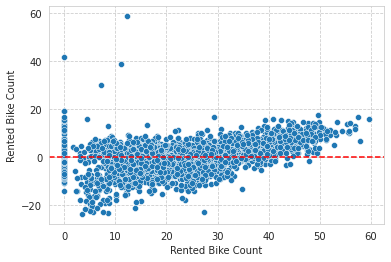

In [ ]:
# residual plot
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

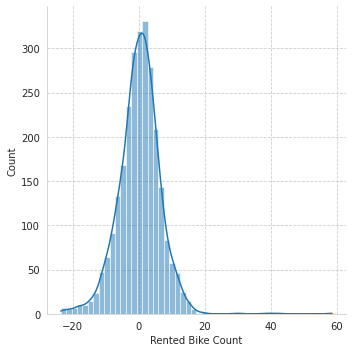

In [ ]:
# Check Normal probability plot
sns.displot(test_residuals, bins=50, kde=True)

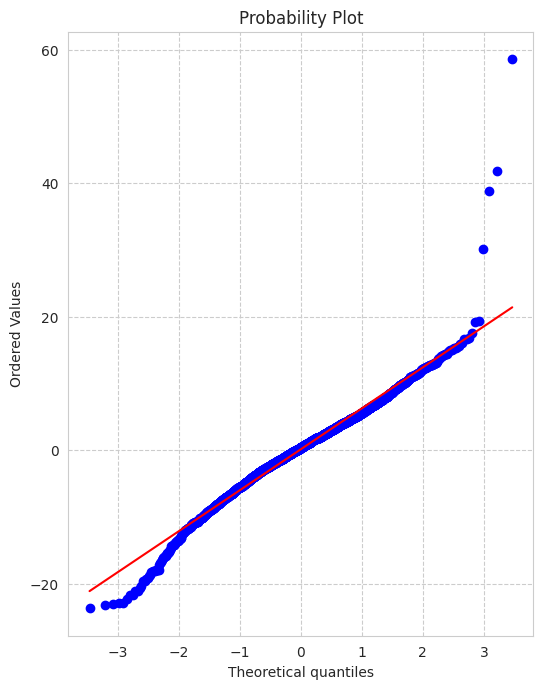

In [ ]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
_ = sp.stats.probplot(test_residuals,plot=ax)


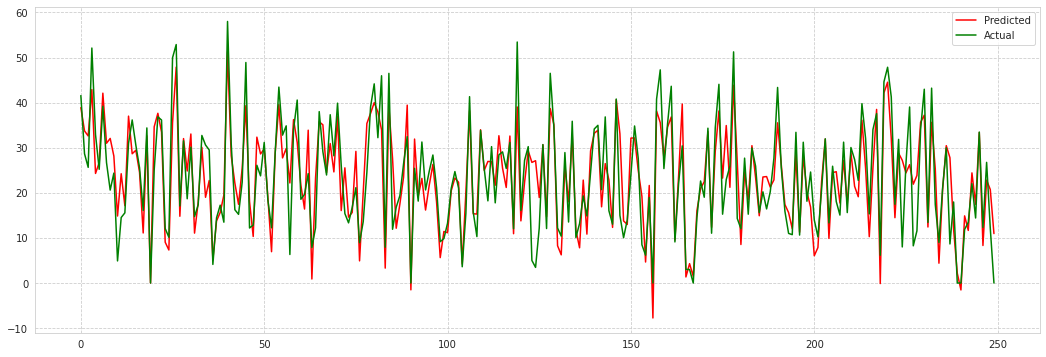

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

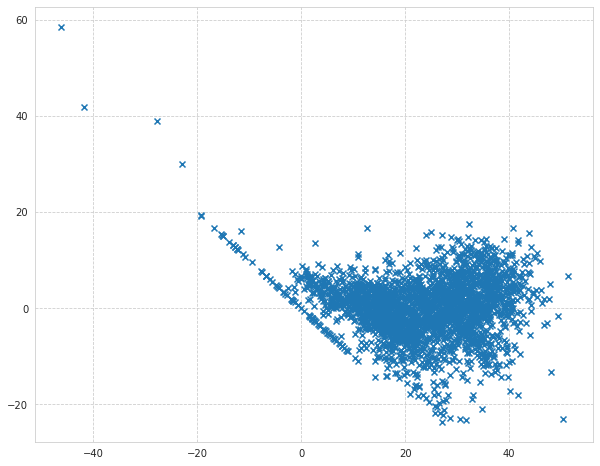

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')

## **Observation:**

* From residual and normal Probability plot, it is clearly visible our model is not perfect. We have to go for next level. 

## **7.2-Polynomial Linear Regression**

* Transform our original data set by adding polynomial features

In [ ]:
# importing polynominal features from sklearn
from sklearn.preprocessing import PolynomialFeatures

# polynomial convertion
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
# Converter "fits" to data, in this case, reads in every X column

poly_features = polynomial_converter.fit_transform(X)

In [ ]:
poly_features.shape

(8760, 1175)

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [ ]:
print_metrics(X_test, test_predictions)
Adjusted_R2(y_test, test_predictions)


MSE is: 36.819541062123164
RMSE is: 6.0679107658339175
R2 score: is 0.7576429138748177
MAE is: 3.0644573061123292


('Adjusted R2 :', 0.5615206162184203)

## **7.3-Regularized Linear Regression**

Regularization attempts to minimize the RSS (residual sum of squares) and a penalty factor. This penalty factor will penalize models that have coefficients that are too large.

### **7.3.1-Ridge Regression(L2 regularization)**

In [ ]:
# Initalizing ridge regression
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [ ]:
## predict the model
test_predictions = ridge_model.predict(X_test)

In [ ]:
# Calculate the performance metrics
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 36.307486950489285
RMSE is: 6.025569429563424
R2 score: is 0.7610134051643376
MAE is: 3.1122129126054934


('Adjusted R2 :', 0.5676186056244592)

### **Choosing an Alpha value with cross-validation**

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error',cv=5)

In [ ]:
ridge_cv_model.fit(X_train,y_train)
ridge_cv_model.alpha_

1.0

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 37.182757050608544
RMSE is: 6.097766562488969
R2 score: is 0.7552521190396819
MAE is: 3.057669404016994


('Adjusted R2 :', 0.5571951217060912)

In [ ]:
# dict2={'Model':'Ridge regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df=test_df.append(dict2,ignore_index=True)

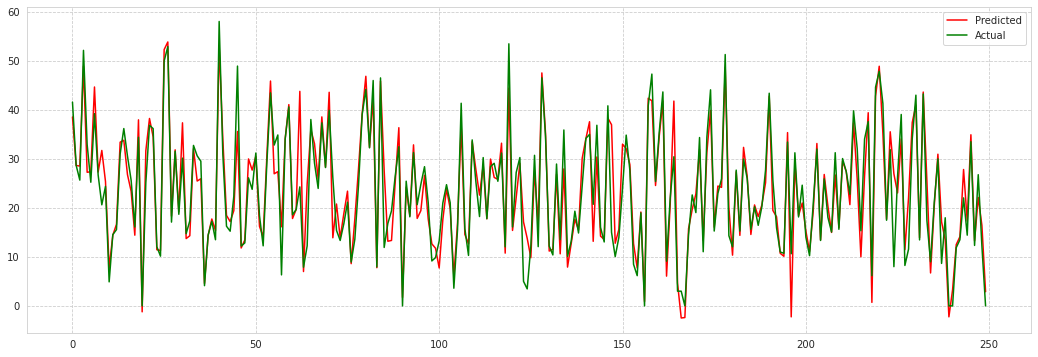

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

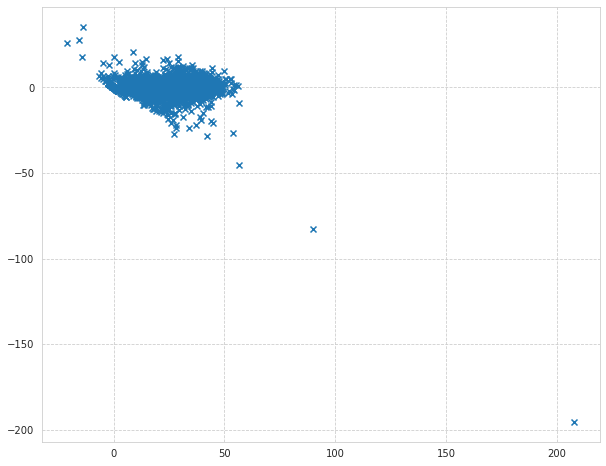

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')

### **7.3.2-Lasso Regression(L1 Regularization) with cross-validation**

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
# Initalizing lasso regression
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=3,max_iter=1000000)
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, max_iter=1000000)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=3, max_iter=1000000)

In [ ]:
lasso_cv_model.alpha_

3490.7505709843863

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

In [ ]:
# Calculate the performance metrics
print_metrics(y_test, test_predictions)
Adjusted_R2(y_test, test_predictions)

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


('Adjusted R2 :', -0.14002377838628854)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict1={'Model':'Lasso regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# dict2={'Model':'Lasso regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df=test_df.append(dict2,ignore_index=True)

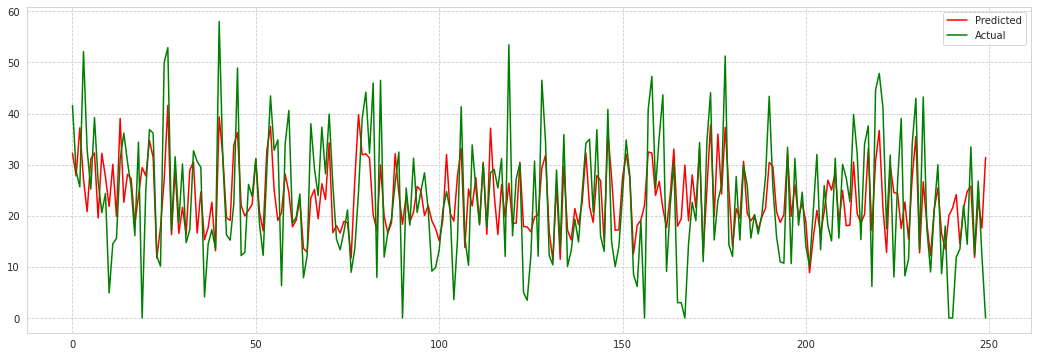

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

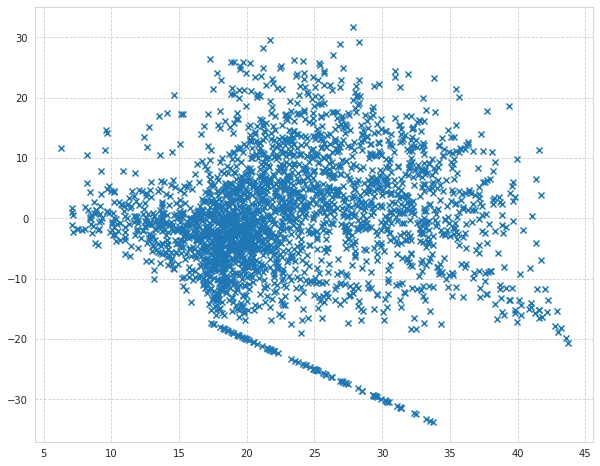

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')

### **7.3.3-Elastic Net Regression**

In [ ]:
# Initializing model
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#checking score
elnet.score(X_train, y_train)

0.854608204671273

In [ ]:
# Train Test values
y_pred_train_en=elnet.predict(X_train)
y_pred_test_en=elnet.predict(X_test)

In [ ]:
# Calculating Performance Metrics for training data
print_metrics((y_train), (y_pred_train_en))

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_en))

('Adjusted R2 :', 0.7369529983963045)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict1={'Model':'Elasticnet regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
print_metrics((y_test), (y_pred_test_en))

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_en))

('Adjusted R2 :', 0.6818414324805601)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict2={'Model':'Elasticnet regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df=test_df.append(dict2,ignore_index=True)

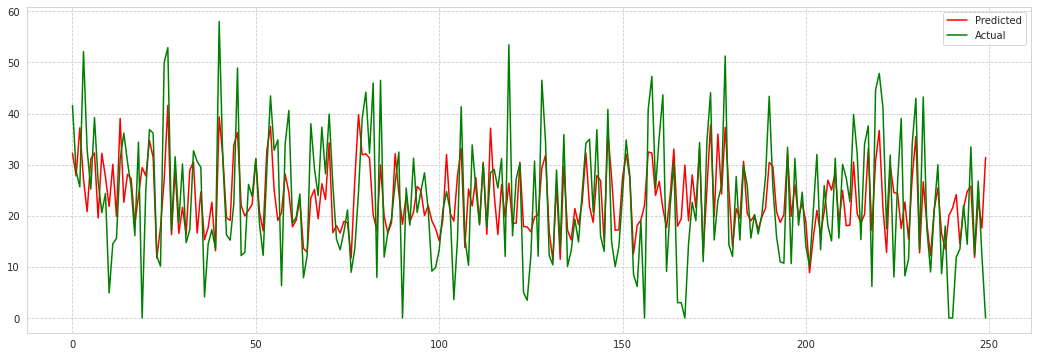

In [ ]:
# Plot between actual target variable vs Predicted one
plt.figure(figsize=(18,6))
plt.plot(test_predictions[:250], color='r')
plt.plot(np.array(y_test)[:250], color='g')
plt.legend(["Predicted","Actual"])
plt.show()

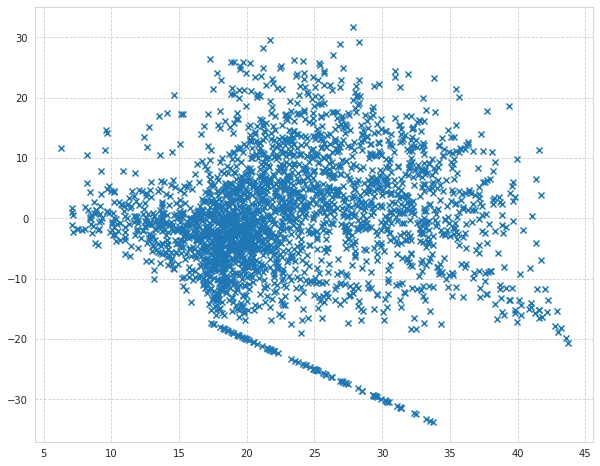

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((test_predictions),(y_test)-(test_predictions),marker='x')

# **7.4-Decision Tree Regression**

In [ ]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [ ]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [ ]:
# Calculating Performance Metrics for training data
print_metrics((y_train), (y_pred_train_d))

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_d))

('Adjusted R2 :', -0.01050885149480707)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict1={'Model':'Decision tree regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_d))

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_d))

('Adjusted R2 :', -0.06668820136623799)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict2={'Model':'Decision tree regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df=test_df.append(dict2,ignore_index=True)

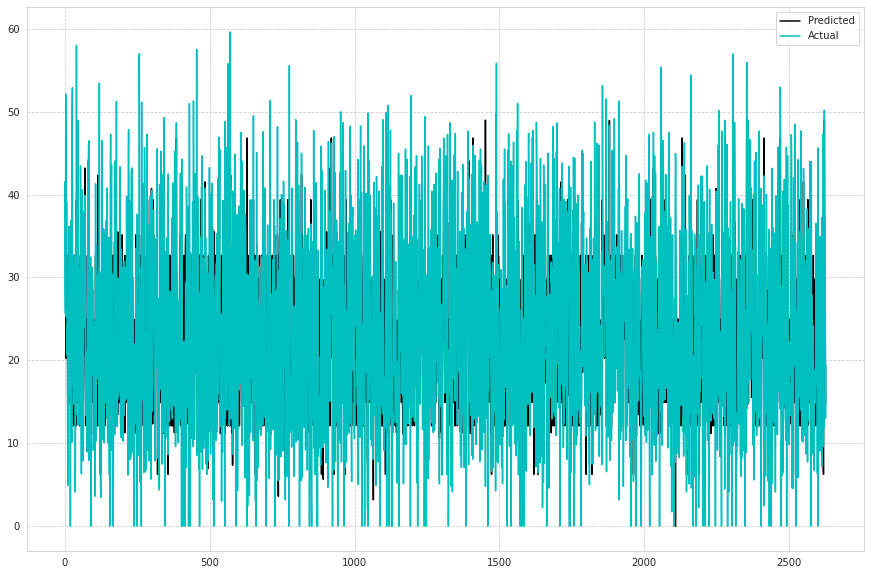

In [ ]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

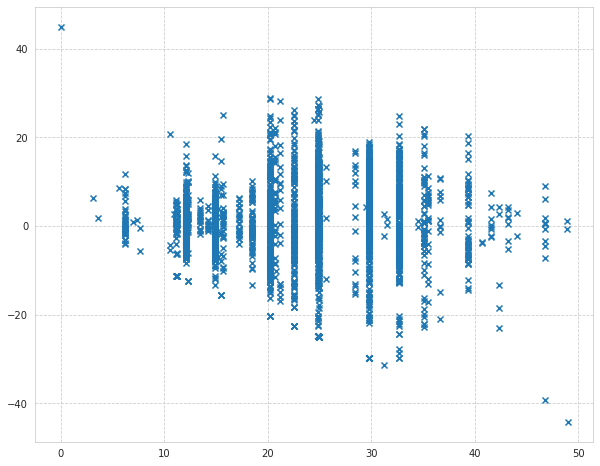

In [ ]:
#Checking Heteroscadacity
plt.figure(figsize=(10,8))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),marker='x')

## **7.5-Random Forest Regression**

In [ ]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [ ]:
#Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_rf))

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_rf))

('Adjusted R2 :', 0.9743840724576446)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict1={'Model':'Random forest regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_rf))

MSE is: 95.72890738461693
RMSE is: 9.784115053729536
R2 score: is 0.36988407833388237
MAE is: 7.440298583405543


In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_rf))

('Adjusted R2 :', 0.815605529953245)

In [ ]:
# Making a dataset for comparing performance metrics later

# dict2={'Model':'Random forest regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
rf_model.feature_importances_

array([4.27399474e-03, 5.05409946e-02, 6.00895060e-04, ...,
       1.96686274e-05, 4.59263250e-05, 2.10849952e-04])

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

AttributeError: ignored

In [ ]:
plt.style.use('dark_background')

NameError: ignored

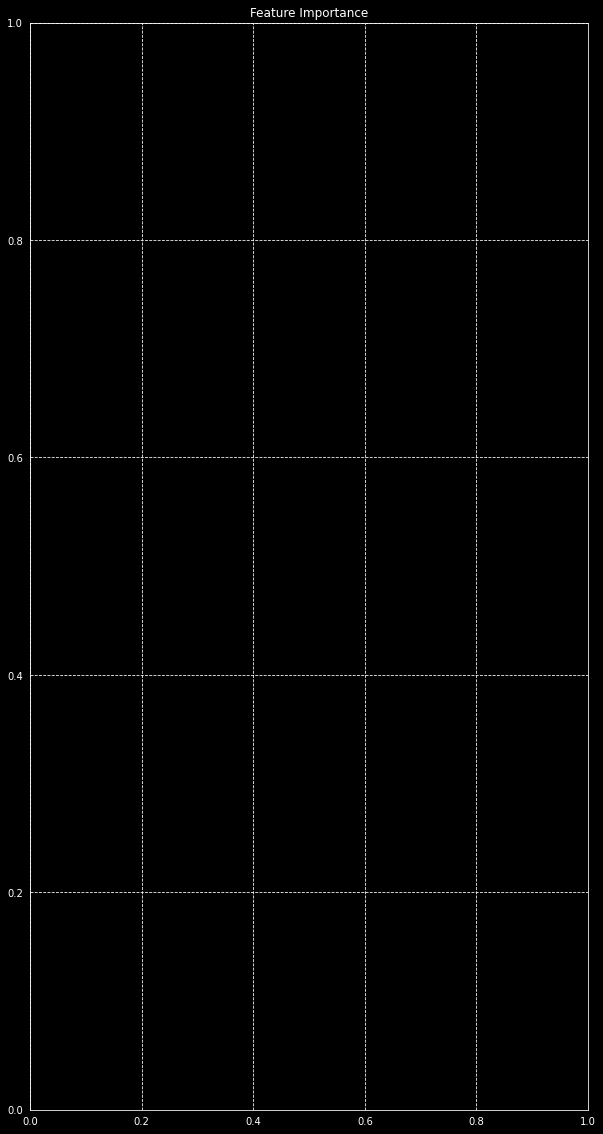

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## **7.6-XG Boost Regression**

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=False) 
X = df1.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df1['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [ ]:
#Fitting the model
xgb_r.fit(X_train, y_train)

In [ ]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_xgb))

In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_xgb))

**R2 score value is 0.86 it means that our model is able to capture most of the data variance.**

In [ ]:
# dict1={'Model':'XG Boost Regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for Test data
print_metrics((y_test), (y_pred_test_xgb))

In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_xgb))

In [ ]:
# Making a dataset for comparing performance metrics later

# dict2={'Model':'XG Boost Regression',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df=test_df.append(dict2,ignore_index=True)

In [ ]:
# Feature importances
xgb_r.feature_importances_

In [ ]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

In [ ]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **Hyperparameter Tuning**

**For improvement of our model lets do some Hyper parameter tuning.**

## **7.7-XG Boost Regressor with GridSearchCV**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
parameter_dict

In [ ]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

In [ ]:
xg_grid.best_estimator_

In [ ]:
xg_optimal_model = xg_grid.best_estimator_

In [ ]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [ ]:
# Calculating Performance Metrics for train data
print_metrics((y_train), (y_pred_train_xg_opt))

In [ ]:
#adjusted R2 score
Adjusted_R2((y_train), (y_pred_train_xg_opt))

In [ ]:
# Making a dataset for comparing performance metrics later

# dict1={'Model':'XG boost regg GridserachCV',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# Calculating Performance Metrics for test data
print_metrics((y_test), (y_pred_test_xg_opt))

In [ ]:
#adjusted R2 score
Adjusted_R2((y_test), (y_pred_test_xg_opt))

In [ ]:
# Making a dataset for comparing performance metrics later

# dict2={'Model':'XG boost regg GridserachCV',
#        'MAE':round((MAE),3),
#        'MSE':round((MSE),3),
#        'RMSE':round((RMSE),3),
#        'R2':round((R2),3),
#        'Adj_R2':round((Adj_R2 ),2)
#        }
# test_df = test_df.append(dict2,ignore_index=True)

In [ ]:
xg_optimal_model.feature_importances_

In [ ]:
xg_optimal_model.fit(X_train,y_train)

In [ ]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

**CONCLUSION**

**In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.**

**Next we implemented 7 machine learning algorithms Linear Regression, Lasso,Ridge,Elastic Net,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.**

**Following are the results of our evaluation: **


In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

# **8-Model explainability**

In [ ]:
!pip install lime
!pip install shap
!pip install eli5

In [ ]:
# import for model explainibility
import lime
from lime import lime_tabular
import eli5 as eli
import shap

### **Defining Functions for model explainability**

###<b> Lime

In [ ]:
def model_explainability_lime(model,num_features,row_number):
  test = pd.DataFrame(X_test)
  lime_explainer = lime_tabular.LimeTabularExplainer(
      training_data = X_train_scaled,
      feature_names = new_X.columns.values,
      mode = 'regression',
      verbose=True,
      random_state =42 )

  lime_exp = lime_explainer.explain_instance(
      data_row = X_test.iloc[row_number],
      predict_fn = model.predict,num_features=num_features,
  )
  return lime_exp.show_in_notebook(show_table=True,)

###<b>Shap

In [ ]:
def model_explainability_shap(model,for_instance):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model)
  # obtain shap values for the first row of the test data
  shap_values = explainer(X_test,check_additivity=False)
  # visualize the first prediction's explanation with a force plot
  return shap.plots.force(shap_values[for_instance])

###<b> ELI5

In [ ]:
# Show Prediction and explaining with all features
def model_explainability_eli5(model,row_number) :
  return eli.show_prediction(model, np.array(X_test.iloc[row_number]),
                    feature_names=X_test.columns.values,
                    show_feature_values=True)

## **9-Final Observations:**

Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% for Test set.

No overfitting is seen.

We can deploy XG Boost Gridsearch CV model.

# **10. Results**

## **Defining Functions for model explainability**

###<b> Lime

In [ ]:
def model_explainability_lime(model,num_features,row_number):
  test = pd.DataFrame(X_test)
  lime_explainer = lime_tabular.LimeTabularExplainer(
      training_data = X_train_scaled,
      feature_names = new_X.columns.values,
      mode = 'regression',
      verbose=True,
      random_state =42 )

  lime_exp = lime_explainer.explain_instance(
      data_row = X_test.iloc[row_number],
      predict_fn = model.predict,num_features=num_features,
  )
  return lime_exp.show_in_notebook(show_table=True,)

###<b>Shap

In [ ]:
def model_explainability_shap(model,for_instance):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model)
  # obtain shap values for the first row of the test data
  shap_values = explainer(X_test,check_additivity=False)
  # visualize the first prediction's explanation with a force plot
  return shap.plots.force(shap_values[for_instance])

###<b> ELI5

In [ ]:
# Show Prediction and explaining with all features
def model_explainability_eli5(model,row_number) :
  return eli.show_prediction(model, np.array(X_test.iloc[row_number]),
                    feature_names=X_test.columns.values,
                    show_feature_values=True)